# Red Inicial


## Imports


In [1]:
from __future__ import annotations

from itertools import product
from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from custom_env.actions import Acciones
from custom_env.router_env import RouterEnv
from gymnasium import make
from gymnasium.utils.env_checker import check_env
from pandas import DataFrame, Series
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.logger import Logger, configure
from stable_baselines3.common.monitor import Monitor

Cargado a las 2025-03-12 13:54:04.647894


In [2]:
name = "Example"
tmp_path = "./train_log/"
env_id = "RouterEnv-v0"

progress_bar = True
if progress_bar == True:
    import rich
    import tqdm

## Clases y Funciones


In [3]:

"""

class PacketAttack(Enum):
    @staticmethod
    def new_set(description, weight, class_ref):
        return {
            "Description": description,
            "weight": weight,
            "class": class_ref
        }

    @staticmethod
    def not_implemented():
        raise NotImplementedError(f"Class not implemented")
    @classmethod
    @cache
    def weights(cls):
        attack_weights = []
        for attack in PacketAttack:
            attack_weights.append(attack.value["weight"])
        return np.array(attack_weights)

    # ----ENUM VALUES----
    DOS = new_set("Denial of Service", 1.0, DOS_Packet_Generator)
    DDOS = new_set("Distributed Denial of Service", 2.0, DDOS_Packet_Generator)


gen = DOS_Packet_Generator(step_dur=1e-6,seed=1)




print(len(gen.generate_packets()))

"""

'\n\nclass PacketAttack(Enum):\n    @staticmethod\n    def new_set(description, weight, class_ref):\n        return {\n            "Description": description,\n            "weight": weight,\n            "class": class_ref\n        }\n\n    @staticmethod\n    def not_implemented():\n        raise NotImplementedError(f"Class not implemented")\n    @classmethod\n    @cache\n    def weights(cls):\n        attack_weights = []\n        for attack in PacketAttack:\n            attack_weights.append(attack.value["weight"])\n        return np.array(attack_weights)\n\n    # ----ENUM VALUES----\n    DOS = new_set("Denial of Service", 1.0, DOS_Packet_Generator)\n    DDOS = new_set("Distributed Denial of Service", 2.0, DDOS_Packet_Generator)\n\n\ngen = DOS_Packet_Generator(step_dur=1e-6,seed=1)\n\n\n\n\nprint(len(gen.generate_packets()))\n\n'

In [4]:
tiempo_global: float = 0.0
iteraciones = 0
# Decaorador auxiliar para poder medir el tiempo de las funciones


def medir_tiempo(activado=False):
    def fun(funcion):
        def wrapper(*args, **kwargs):
            if not activado:
                return funcion(*args, **kwargs)
            fun_tiempo = perf_counter
            inicio: float = fun_tiempo()
            resultado = funcion(*args, **kwargs)
            tiempo_total: float = fun_tiempo() - inicio
            global tiempo_global, iteraciones
            medida = 1e6
            t: float = tiempo_total*medida
            tiempo_global += t
            iteraciones += 1
            print(f"Tiempo de ejecución de {
                funcion.__name__}: {t:.2f} micro-segundos")
            return resultado
        return wrapper
    return fun

## Entrenamiento


In [ ]:

seed = None
env: RouterEnv = make(env_id, seed=seed)
# env = RouterEnv(seed=None)
check_env(env)

new_logger: Logger = configure(tmp_path, ["stdout", "csv"])
env = Monitor(env, tmp_path)


model: PPO = PPO("MultiInputPolicy", env,
                 verbose=True)


"""
eval_callback = EvalCallback(
    env,  # Entorno de evaluación
    best_model_save_path="./logs/best_model",  # Ruta para guardar el mejor modelo
    log_path="./logs",  # Ruta para guardar estadísticas
    eval_freq=10000,  # Frecuencia de evaluación (en pasos)
    deterministic=True,
    render=False,
)
, callback=eval_callback
"""
"""
ep_info = a.ep_info_buffer
print(a.ep_info_buffer)
if ep_info is not None and len(ep_info) > 0:
    rew=ep_info[0]["r"]
    print(rew)
    saved= PPO.load("Example")
    print(ep_info.pop())
"""


model.set_logger(new_logger)
try:
    model.learn(total_timesteps=int(1e5//0.5),
                progress_bar=progress_bar)
except KeyboardInterrupt:
    print("Entrenamiento interrumpido")


g: str = input("¿Desea guardarlo? (s/n) ")
if g.lower() == "s":
    model.save(name)
    print("Modelo guardado")

Logging to ./train_log/
Using cpu device
Wrapping the env in a DummyVecEnv.


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | -89.5    |
| time/              |          |
|    fps             | 563      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------


Entrenamiento interrumpido

### Gráficas de Entrenamiento


['rollout/ep_len_mean', 'time/total_timesteps', 'time/iterations', 'time/fps', 'time/time_elapsed', 'rollout/ep_rew_mean', 'train/clip_range', 'train/approx_kl', 'train/learning_rate', 'train/loss', 'train/clip_fraction', 'train/value_loss', 'train/policy_gradient_loss', 'train/n_updates', 'train/explained_variance', 'train/entropy_loss']


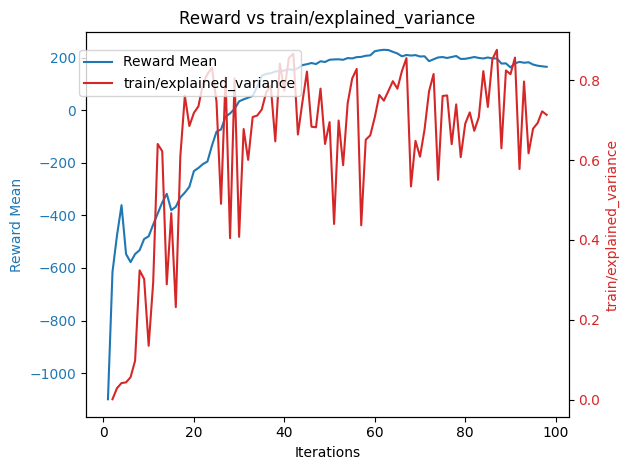

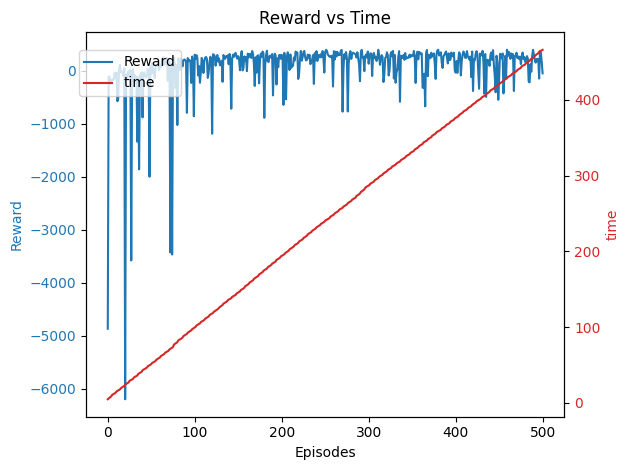

In [ ]:
train_data_log: DataFrame = pd.read_csv(tmp_path+"progress.csv")
train_data_monitor: DataFrame = pd.read_csv(tmp_path+"monitor.csv", header=1)

# train_data_monitor = pd.concat([train_data_monitor] * 3, ignore_index=True)
print(train_data_log.columns.to_list())

fig, ax1 = plt.subplots()

iterations: Series[int] = train_data_log['time/iterations'].astype(int)


ax1.set_xlabel('Iterations')
color = 'tab:blue'
ax1.set_ylabel('Reward Mean', color=color)
ax1.plot(iterations,
         train_data_log['rollout/ep_rew_mean'], color=color, label='Reward Mean')
ax1.tick_params(axis='y', labelcolor=color)


col = 'train/explained_variance'

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel(col, color=color)
ax2.plot(iterations, train_data_log[col], color=color, label=col)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Reward vs ' + col)


fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.9))

plt.show()


fig, ax1 = plt.subplots()

episodes = range(len(train_data_monitor['l']))

# Plot rollout/ep_rew_mean on the first y-axis
ax1.set_xlabel('Episodes')
color = 'tab:blue'
ax1.set_ylabel('Reward', color=color)
ax1.plot(episodes, train_data_monitor['r'], color=color, label='Reward')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Reward vs Time')


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('time', color=color)
ax2.plot(episodes, train_data_monitor['t'], color=color, label='time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.9))

plt.show()

## Comprobación funcionamiento


In [5]:
seed = None
env = make(env_id, seed=seed)
model = PPO.load(name, print_system_info=True)
print(type(env))
num_steps = 1
obs, _ = env.reset()
# Variables de información:
acciones = []
rewards = []
ocu = []
tams = []
num = []
lim_ocu = 0
a2 = []
estados=[]

# -------------------------

_states = None
ant = env._get_info()
for episode in range(num_steps):

    done = False
    step_counter = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, terminated, info = env.step(action)
        if len(ant) > 0 and ant != info:
            print(info["Stats"])
        ant = info

        ocu.append(info["Stats"]["OcupacionActual"])
        tams.append(info["Stats"]["TamañoTotal"])
        num.append(info["Stats"]["NumPaquetes"])
        a2.append(info["Stats"]["Action"])
        estados.append(info["Stats"]["EstadoMaquina"])

        rewards.append(reward)
        acciones.append(action.item())

        done: bool = done or terminated

    env.reset(seed=seed)
    step_counter += 1
#estados = env.registro_Estados()
# Debug
print(f"Acciones: {acciones}")
print(list(map(lambda x: Acciones.int_to_action(x), acciones)))
print(list(map(lambda x: int(round(x, 0)), rewards)))
print(a2)
print(acciones.count(acciones[-1])/len(acciones))

== CURRENT SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

== SAVED MODEL SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

<class 'custom_env.router_env.RouterEnv'>
{'EstadoMaquina': 'AttackState', 'NumPaquetes': 0, 'TamañoTotal': 0.0, 'Action': <Acciones.PERMITIR: 1>, 'OcupacionActual': 0.0, 'Descartados': 0}
{'EstadoMaquina': 'AttackState', 'NumPaquetes': 4, 'TamañoTotal': 396.0, 'Action': <Acciones.PERMITIR: 1>, 'OcupacionActual': 0.016, 'Descartados': 0}
{'EstadoMaquina': 'AttackState', 'NumPaquetes': 8, 'TamañoTotal': 733.0, 'Action': <Acciones.PERMITIR: 1>, 'OcupacionActual': 0.032, 'Descartados': 0}
{'EstadoMaquina': 'AttackState', 'NumPaquetes': 11, 'TamañoTotal': 1005.0, 'Actio

In [6]:
assert len(acciones) != a2.count(
    Acciones.DENEGAR), "Se han denegado todos los paquetes"
assert len(acciones) != a2.count(
    Acciones.PERMITIR), "Se han permitido todos los paquetes"

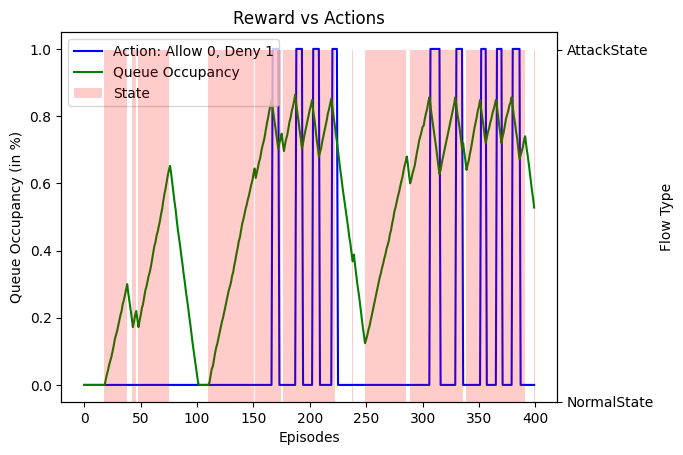

Rewards:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -2.75, -2.5, -2.5, -2.75, -2.5, -2.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -2.75, -2.5, -2.5, -2.75, -2.75, -2.75, 

In [7]:
assert len(acciones) == len(rewards)
# plt.plot(rewards, label="rewards")

fig, ax1 = plt.subplots()

# Primer eje Y con acciones y ocupación de cola
ax1.plot(acciones, label=f"Action: Allow {Acciones.action_to_int(Acciones.PERMITIR)}, Deny {Acciones.action_to_int(Acciones.DENEGAR)}",color='#0000FF')
ax1.plot(ocu, label="Queue Occupancy",color='green')
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Queue Occupancy (in %)")
ax1.set_title("Reward vs Actions")

# Segundo eje Y con estados en gráfico de barras
ax2 = ax1.twinx()
ax2.bar(range(len(estados)), estados, color='red', label="State", alpha=0.20, width=1)
ax2.set_ylabel("Flow Type")

# Combinar leyendas de ambos ejes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

plt.show()


print("Rewards: ", rewards)
num_permitidos: int = acciones.count(Acciones.action_to_int(Acciones.PERMITIR))
print(num_permitidos, len(acciones)-num_permitidos, "",
      num_permitidos/len(acciones), 1-num_permitidos/len(acciones))

Ocupación:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016, 0.032, 0.044, 0.06, 0.072, 0.084, 0.1, 0.116, 0.136, 0.148, 0.16, 0.176, 0.192, 0.208, 0.22, 0.24, 0.252, 0.268, 0.284, 0.3, 0.272, 0.248, 0.224, 0.2, 0.172, 0.188, 0.208, 0.22, 0.196, 0.172, 0.192, 0.208, 0.228, 0.24, 0.26, 0.28, 0.292, 0.308, 0.324, 0.336, 0.352, 0.372, 0.392, 0.412, 0.424, 0.444, 0.456, 0.472, 0.488, 0.508, 0.524, 0.548, 0.568, 0.584, 0.604, 0.624, 0.64, 0.652, 0.628, 0.6, 0.572, 0.544, 0.52, 0.488, 0.46, 0.436, 0.412, 0.384, 0.36, 0.332, 0.308, 0.28, 0.256, 0.232, 0.204, 0.18, 0.152, 0.124, 0.1, 0.076, 0.052, 0.028, 0.004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008, 0.028, 0.048, 0.056, 0.076, 0.096, 0.112, 0.124, 0.14, 0.156, 0.172, 0.188, 0.2, 0.216, 0.232, 0.248, 0.264, 0.28, 0.292, 0.304, 0.324, 0.336, 0.356, 0.372, 0.392, 0.408, 0.428, 0.44, 0.46, 0.48, 0.492, 0.508, 0.524, 0.536, 0.552, 0.564, 0.58, 0.596, 0.608, 0.628, 0.644, 0.616, 0.63

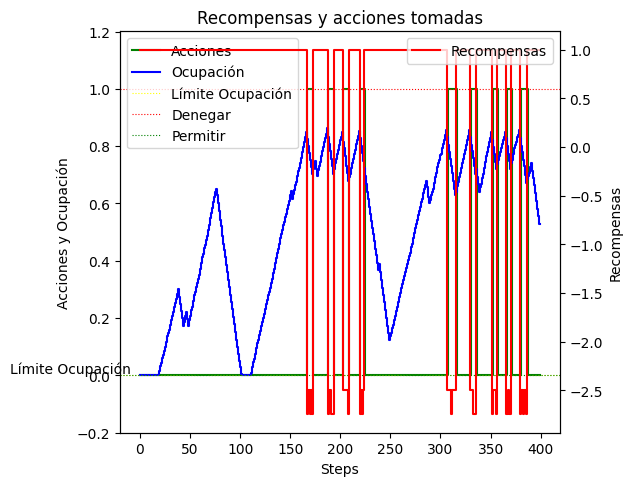

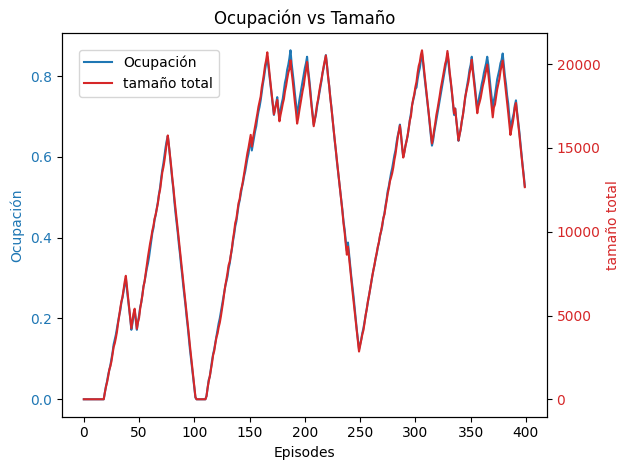

La ocupación máxima es de 86%
La ocupación mínima es de 0%


In [10]:
print("Ocupación: ", ocu)
fig, ax1 = plt.subplots()

# Configurar el eje X e Y
ax1.set_xlabel('Steps')
ax1.set_ylabel('Acciones y Ocupación')

# Graficar las acciones y la ocupación
ax1.step(range(len(acciones)), acciones, label="Acciones", where='post',color='green')
# ax1.step(range(len(acciones)), [1] * len(acciones), label="Denegar", where='mid')  # Ajustar según tus datos
ax1.step(range(len(ocu)), ocu, label="Ocupación", where='mid', color='blue')

# Crear línea horizontal en el gráfico
ax1.axhline(y=lim_ocu, color='yellow', linestyle='dotted',
            linewidth=0.8, label='Límite Ocupación')

# Agregar marca en el eje Y
ticks = list(ax1.get_yticks())  # Obtener los ticks actuales
if lim_ocu not in ticks:
    ticks.append(lim_ocu)  # Agregar el límite de ocupación a los ticks
ax1.set_yticks(sorted(ticks))  # Actualizar los ticks

# Anotar el límite en el eje
ax1.annotate(
    'Límite Ocupación',
    xy=(-0.1, lim_ocu),  # Coordenada en el eje Y
    xytext=(-50, lim_ocu + 5),
    textcoords='offset points',
    fontsize=10, color='black',
    ha='center',
    va='center'
)
ax1.axhline(y=Acciones.action_to_int(Acciones.DENEGAR), color='red',
            linestyle='dotted', linewidth=0.8, label='Denegar')
ax1.axhline(y=Acciones.action_to_int(Acciones.PERMITIR),
            color='green', linestyle='dotted', linewidth=0.8, label='Permitir')


# Leyenda del primer eje
ax1.legend(loc='upper left')

# Crear segundo eje Y para las recompensas
ax2 = ax1.twinx()
ax2.set_ylabel('Recompensas')
ax2.step(range(len(rewards)), rewards,
         label="Recompensas", where='mid', color='r')

# Leyenda del segundo eje
ax2.legend(loc='upper right')

# Ajustar diseño y mostrar título
fig.tight_layout()
plt.title("Recompensas y acciones tomadas")
plt.show()


tam = [x/1 for x in tams]


"""
plt.step(range(len(acciones)), acciones, label="acciones", where='mid')
plt.step(range(len(acciones)), [Acciones.action_to_int(Acciones.DENEGAR)]*len(acciones), label="Denegar", where='mid')
plt.plot([lim_ocu]*len(ocu), label="LimiteOcupación")
"""

fig, ax1 = plt.subplots()

train_data_monitor: DataFrame = pd.read_csv(tmp_path+"monitor.csv", header=1)
episodes = range(len(train_data_monitor['l']))

# Plot rollout/ep_rew_mean on the first y-axis
ax1.set_xlabel('Episodes')
color = 'tab:blue'
label = 'Ocupación'
ax1.set_ylabel(label, color=color)
ax1.plot(range(len(ocu)), ocu, color=color, label=label)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Ocupación vs Tamaño')


ax2 = ax1.twinx()
color = 'tab:red'
label = 'tamaño total'
ax2.set_ylabel(label, color=color)
ax2.plot(range(len(tams)), tam, color=color, label=label)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.9))

plt.show()

"""plt.step(range(len(ocu)),ocu, label="Ocupación",where='mid')
plt.step(range(len(tams)),tam, label="Tamaño",where='mid')


plt.title("Recompensas y acciones tomadas")
plt.legend()
plt.show()"""
print(f"La ocupación máxima es de {np.max(ocu):.0%}")
print(f"La ocupación mínima es de {np.min(ocu):.0%}")

## Pruebas:


In [11]:
print(f"Tiempo medio: {tiempo_global/iteraciones if abs(iteraciones) > 1e-5 else 0:.2f} micro-segundos de {iteraciones} iteraciones")

Tiempo medio: 0.00 micro-segundos de 0 iteraciones


In [12]:
print(Acciones.action_to_int(Acciones.PERMITIR))
print(Acciones.action_to_int(Acciones.DENEGAR))

0
1


['NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'AttackState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalState', 'NormalSt

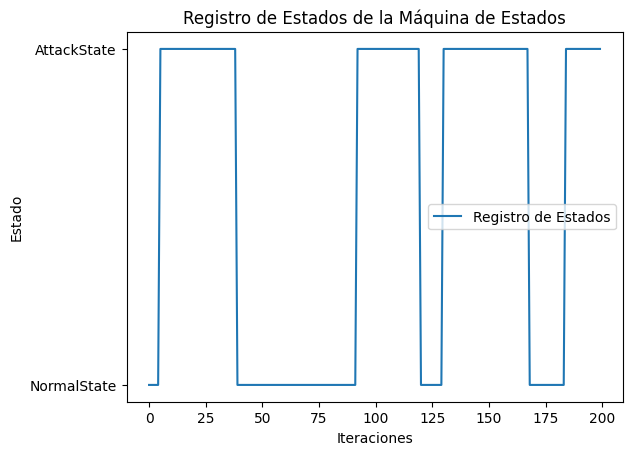

In [13]:
from custom_env.states import *
maquina = MaquinaDeEstados()
for _ in range(200):
    maquina.cambiar_estado()
print(maquina.registro_estados)

plt.plot(maquina.registro_estados, label="Registro de Estados")
plt.xlabel("Iteraciones")
plt.ylabel("Estado")
plt.title("Registro de Estados de la Máquina de Estados")
plt.legend()
plt.show()

In [14]:
# Lista de ejemplo
lista: list[str] = [x.__name__ for x in maquina.estados_posibles]
combinaciones_con_repeticion = list(product(lista, repeat=2))
dict_con: dict[tuple[str, str], int] = {
    x: 0 for x in combinaciones_con_repeticion}

print(dict_con)
duracion_ataques = []
estado_Ant = maquina.registro_estados[0]

for estado in maquina.registro_estados[1:]:
    dict_con[(estado_Ant, estado)] += 1

    if (estado_Ant, estado) == (NormalState.__name__, AttackState.__name__):  # Empieza ataque
        duracion_ataques.append(1)
    elif (estado_Ant, estado) == (AttackState.__name__, AttackState.__name__):  # Sigue ataque
        if len(duracion_ataques) > 0:
            duracion_ataques[-1] += 1

    estado_Ant: BaseState = estado

print(
    f"Como promedio los {len(duracion_ataques)} ataques duran {np.mean(duracion_ataques):.1f} iteraciones.")
print("Duracion 5 primeros ataques: ", duracion_ataques[:5], "...")
try:
    for estado1 in lista:
        total = 0
        for estado2 in lista:
            total += dict_con[(estado1, estado2)]
        print(f"Estando en {estado1}:")
        for estado2 in lista:
            print(f"De {estado1} a {estado2}: {
                dict_con[(estado1, estado2)] / total:6.2%}")
except:
    pass

{('NormalState', 'NormalState'): 0, ('NormalState', 'AttackState'): 0, ('AttackState', 'NormalState'): 0, ('AttackState', 'AttackState'): 0}
Como promedio los 4 ataques duran 29.0 iteraciones.
Duracion 5 primeros ataques:  [34, 28, 38, 16] ...
Estando en NormalState:
De NormalState a NormalState: 95.24%
De NormalState a AttackState:  4.76%
Estando en AttackState:
De AttackState a NormalState:  2.61%
De AttackState a AttackState: 97.39%


In [15]:
_np_random, _ = seeding.np_random(None)
pak = []
for _ in range(1000):
    pak.append(_np_random.integers(1, 10, endpoint=True))

print(f"{np.min(pak)},{np.max(pak)},{np.mean(pak):.0f},{np.std(pak):.0f}")
pak = []
for _ in range(1000):
    pak.append(_np_random.integers(1, 10, endpoint=False))

print(f"{np.min(pak)},{np.max(pak)},{np.mean(pak):.0f},{np.std(pak):.0f}")
print(type(0.0), type(0))
print(int(0.2))

1,10,6,3
1,9,5,2
<class 'float'> <class 'int'>
0
